# Explore student grade data

Follow the youtube video: https://www.youtube.com/watch?v=C_0mtbAWNtQ. Use the Github repository mslearn-introduction-to-machine-learning.

In [3]:
import pandas as pd

# Read the text file containing data using pandas
df_students = pd.read_csv('Data/ml-basics/grades.csv')

df_students.shape

(24, 3)

In [4]:
type(df_students)

pandas.core.frame.DataFrame

In [5]:
df_students[df_students.isna().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


In [6]:
df_students.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

In [7]:
df_students = df_students.dropna(axis=0)


In [8]:
df_students.shape

(22, 3)

In [9]:
avg_study_hr = df_students['StudyHours'].mean()
avg_grade = df_students['Grade'].mean()

print(f'Average study hours: {avg_study_hr} \n Average grade: {avg_grade}')

Average study hours: 10.522727272727273 
 Average grade: 49.18181818181818


In [10]:
df_students[df_students.StudyHours > avg_study_hr]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


In [11]:
df_students[df_students.Grade >= 60]

,Name,StudyHours,Grade
3,Rosie,16.00,97.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


In [12]:
passed = pd.Series(df_students['Grade'] >= 60)

passed 

df_students = pd.concat([df_students, passed.rename("Passed")], axis=1)

In [13]:
df_students.groupby('Passed').Name.count()


Passed
False    15
True      7
Name: Name, dtype: int64

In [14]:
study_hr_mean = df_students.groupby('Passed').StudyHours.mean()
grade_mean = df_students.groupby('Passed').Grade.mean()

print(f'Study hours mean: \n {study_hr_mean} \n Grade mean: \n {grade_mean}')

Study hours mean: 
 Passed
False     8.783333
True     14.250000
Name: StudyHours, dtype: float64 
 Grade mean: 
 Passed
False    38.000000
True     73.142857
Name: Grade, dtype: float64


In [15]:
df_students.groupby('Passed')[['Grade', 'StudyHours']].mean()

,Grade,StudyHours
Passed,,
False,38.000000,8.783333
True,73.142857,14.250000


In [16]:
# It needs double [[]] here to print the result in a table format.
df_temp = df_students.groupby(df_students.Passed)[['Grade', 'StudyHours']].mean()

print(df_temp)

            Grade  StudyHours
Passed                       
False   38.000000    8.783333
True    73.142857   14.250000


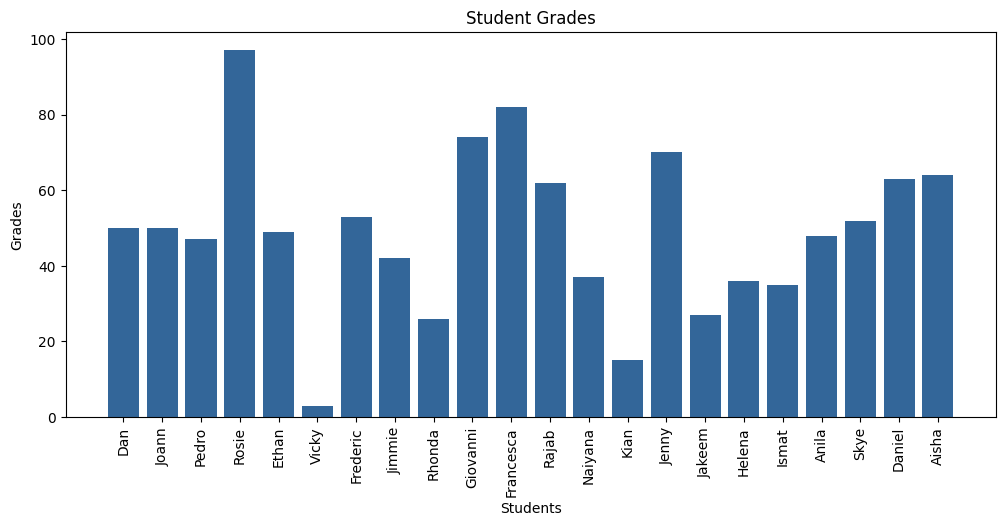

In [17]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12, 5))

plt.bar(df_students.Name, df_students.Grade, color='#336699')
plt.xlabel('Students')
plt.ylabel('Grades')
plt.title('Student Grades')
plt.xticks(rotation=90)

plt.show()

In [18]:
df_students.columns

Index(['Name', 'StudyHours', 'Grade', 'Passed'], dtype='object')

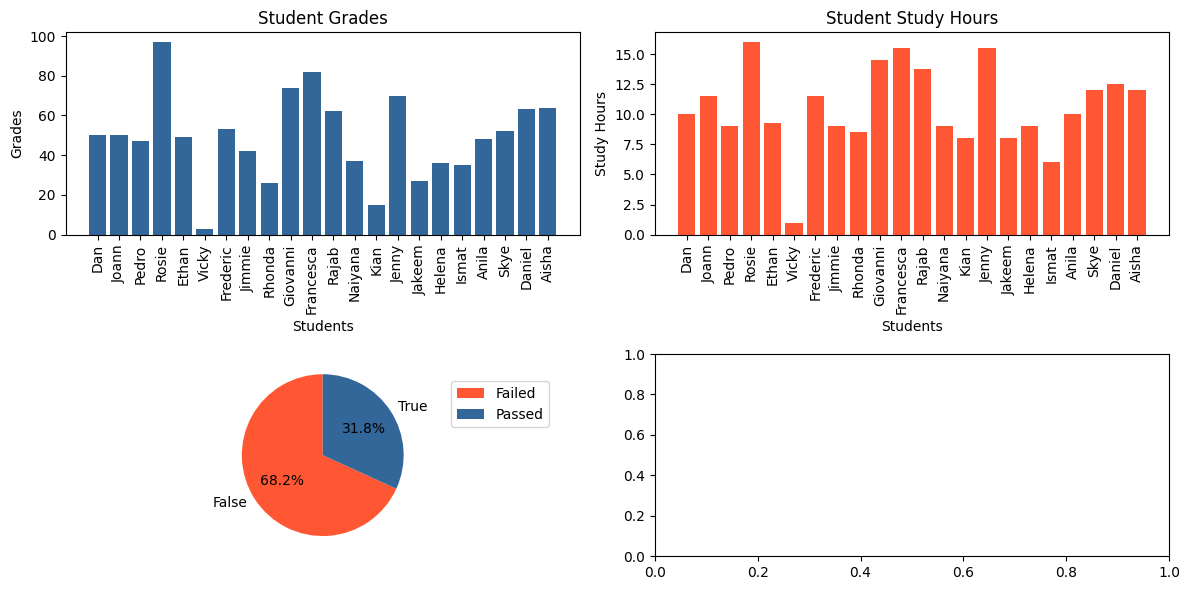

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

# Plotting the grades
ax[0, 0].bar(df_students.Name, df_students.Grade, color='#336699')
ax[0, 0].set_xlabel('Students')
ax[0, 0].set_ylabel('Grades')
ax[0, 0].set_title('Student Grades')
ax[0, 0].tick_params(axis='x', rotation=90)

# Plotting the study hours
ax[0, 1].bar(df_students.Name, df_students.StudyHours, color='#FF5733')
ax[0, 1].set_xlabel('Students')
ax[0, 1].set_ylabel('Study Hours')
ax[0, 1].set_title('Student Study Hours')
ax[0, 1].tick_params(axis='x', rotation=90)

passes_count = df_students['Passed'].value_counts()
ax[1, 0].pie(passes_count, labels=passes_count.index, autopct='%1.1f%%', startangle=90, colors=['#FF5733', '#336699'])
ax[1, 0].legend(labels=['Failed', 'Passed'], bbox_to_anchor=(1.1, 0.9), loc='upper left')

plt.tight_layout()
plt.show()



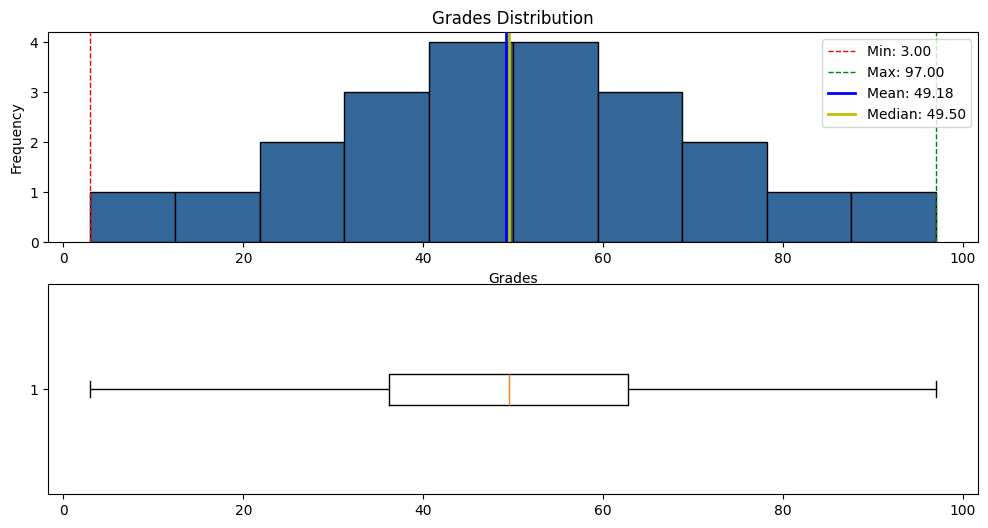

In [20]:
grades = df_students['Grade']

fig, ax = plt.subplots(2, 1, figsize=(12, 6))

grade_min = grades.min()
grade_max = grades.max()
grade_mean = grades.mean()
grade_median = grades.median()

ax[0].hist(grades, bins=10, color='#336699', edgecolor='black')
ax[0].set_title('Grades Distribution')
ax[0].set_xlabel('Grades')
ax[0].set_ylabel('Frequency')
ax[0].axvline(grade_min, color='r', linestyle='dashed', linewidth=1, label=f'Min Grade: {grade_min}')
ax[0].axvline(grade_max, color='g', linestyle='dashed', linewidth=1, label=f'Max Grade: {grade_max}')
ax[0].axvline(grade_mean, color='b', linestyle='solid', linewidth=2, label=f'Mean Grade: {grade_mean}')
ax[0].axvline(grade_median, color='y', linestyle='solid', linewidth=2, label=f'Median Grade: {grade_median}')
ax[0].legend(labels=[
    f'Min: {grade_min:.2f}', 
    f'Max: {grade_max:.2f}', 
    f'Mean: {grade_mean:.2f}', 
    f'Median: {grade_median:.2f}'
])

ax[1].boxplot(grades, vert=False)

plt.show()

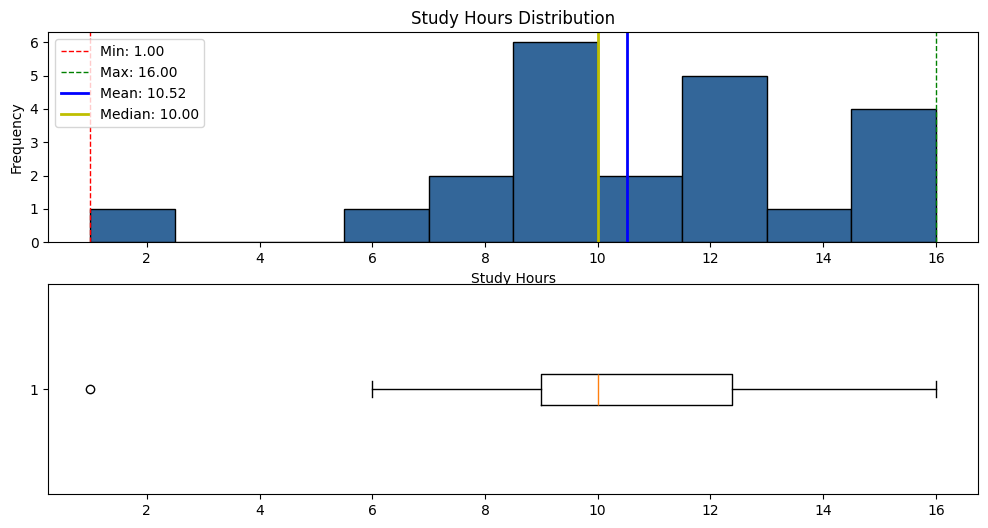

In [21]:
study_hours = df_students['StudyHours']

fig, ax = plt.subplots(2, 1, figsize=(12, 6))

study_hours_min = study_hours.min()
study_hours_max = study_hours.max()
study_hours_mean = study_hours.mean()
study_hours_median = study_hours.median()

ax[0].hist(study_hours, bins=10, color='#336699', edgecolor='black')
ax[0].set_title('Study Hours Distribution')
ax[0].set_xlabel('Study Hours')
ax[0].set_ylabel('Frequency')
ax[0].axvline(study_hours_min, color='r', linestyle='dashed', linewidth=1, label=f'Min Study Hours: {study_hours_min}')
ax[0].axvline(study_hours_max, color='g', linestyle='dashed', linewidth=1, label=f'Max Study Hours: {study_hours_max}')
ax[0].axvline(study_hours_mean, color='b', linestyle='solid', linewidth=2, label=f'Mean Study Hours: {study_hours_mean}')
ax[0].axvline(study_hours_median, color='y', linestyle='solid', linewidth=2, label=f'Median Study Hours: {study_hours_median}')
ax[0].legend(labels=[
    f'Min: {study_hours_min:.2f}', 
    f'Max: {study_hours_max:.2f}', 
    f'Mean: {study_hours_mean:.2f}', 
    f'Median: {study_hours_median:.2f}'
])

ax[1].boxplot(study_hours, vert=False)

plt.show()

<Figure size 1200x600 with 0 Axes>

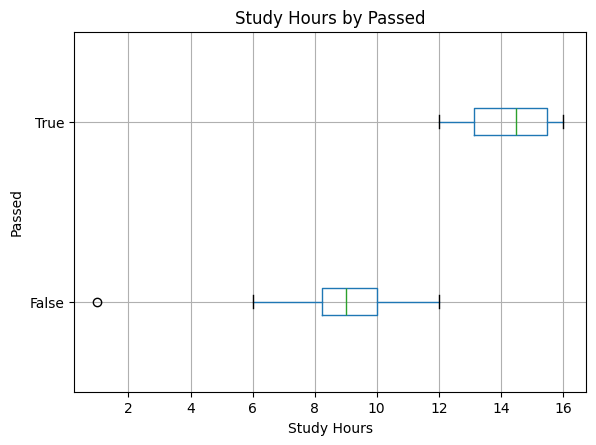

In [22]:
fig = plt.figure(figsize=(12, 6))

# Plotting StudyHours by Passed
df_students.boxplot(column='StudyHours', by='Passed', vert=False, patch_artist=False)
plt.title('Study Hours by Passed')
plt.xlabel('Study Hours')
plt.ylabel('Passed')

plt.suptitle('')
plt.show()

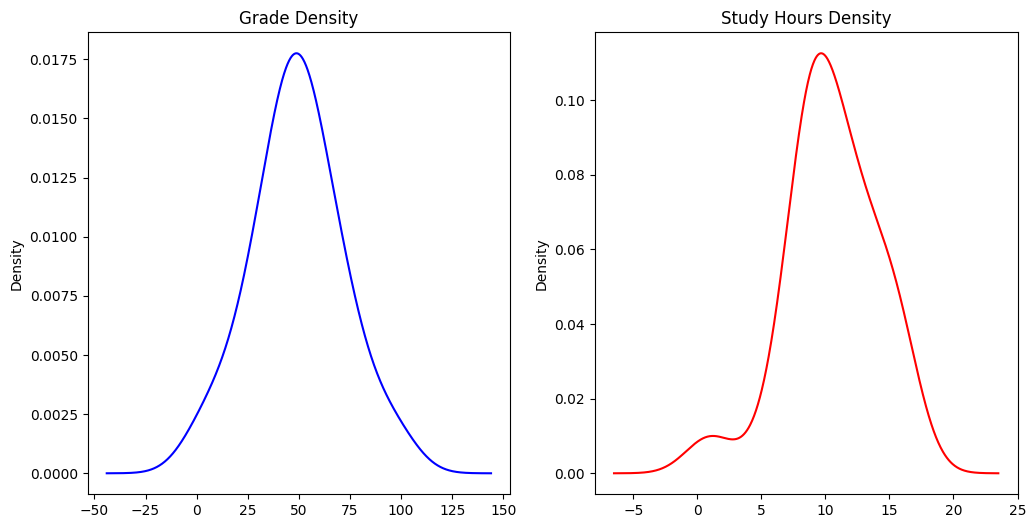

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))


df_students.Grade.plot.density(color='blue', ax = ax[0], label='Grade')
ax[0].set_title('Grade Density')

df_students.StudyHours.plot.density(color='red', ax = ax[1], label='Study Hours')
ax[1].set_title('Study Hours Density')

plt.show()

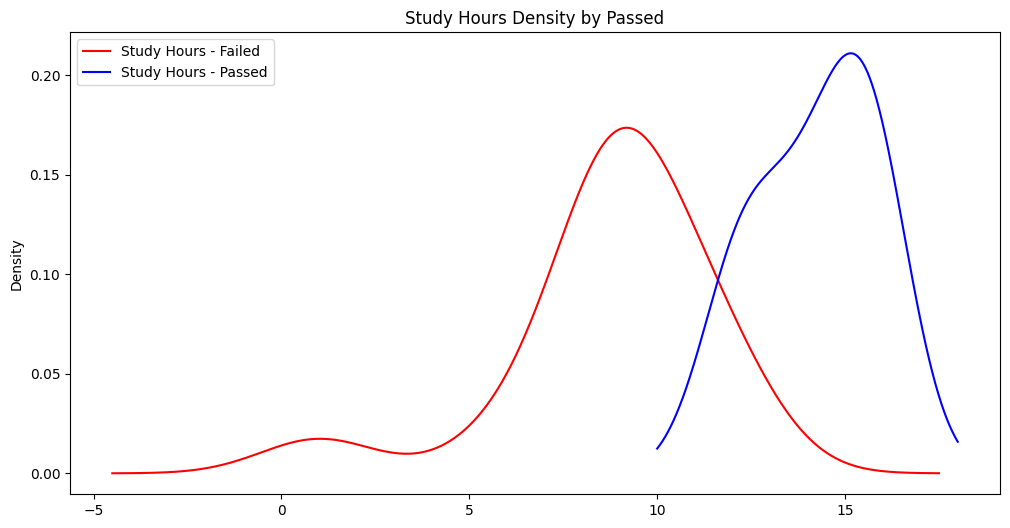

In [32]:
fig = plt.figure(figsize=(12, 6))

colors = {True: 'blue', False: 'red'}
for passed, group in df_students.groupby('Passed'):
    group.StudyHours.plot.density(color=colors[passed], label=f'Study Hours - {"Passed" if passed else "Failed"}')

plt.legend()
plt.title('Study Hours Density by Passed')
plt.show()